# Spotify Data Collection

#### EMAT 22110 - Data in Emerging Media and Technology
#### Author: Kerri Donaldson
#### Created: 4/19/21
#### Last Updated: 5/3/21

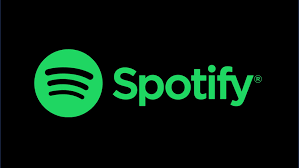

### Quick Overview

This report will go over data collected from the beginning of 2021 to 2020. The goal of this is to find out how much my music taste has changed and who I listen to the most. The question I have is "How has my music taste changed over the past year?" I collected my data from spotify to look at the song, the artist and the album that it came from. I will also need to find out the dates that the songs were listened to.

I also want to see what other data Spotify has collected about me like my name and when I created my account

###### Load in the required packages

In [24]:
import json
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [65]:
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\YourLibrary.json") as yl:
    yourlibrary = json.load(yl)
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\Userdata.json") as ud:
    userdata = json.load(ud)
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\StreamingHistory0.json", encoding = 'utf-8') as s:
    streaming = json.load(s)
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\StreamingHistory1.json") as s1:
    streaming1 = json.load(s1)
with open(r"C:\Users\kdona\Desktop\My Stuff\my_spotify_data\MyData\Identity.json") as i:
    identity = json.load(i)

I was able to pull from the data that I created this account in November of 2014(I was 13). 

They also had my profile picture but surprisingly they did not have my name recorded anywhere. I know that this is not useful but I thought it was cool.

In [26]:
print(userdata["creationTime"])

2014-11-15


In [27]:
print(identity["largeImageUrl"])

https://i.scdn.co/image/ab6775700000ee851f04b8f970ebefee78820879


I started by finding out if the information in the file was a dictionary or a list and then found the keys.

In [28]:
type(yourlibrary)

dict

In [29]:
yourlibrary.keys()

dict_keys(['tracks', 'albums', 'shows', 'episodes', 'bannedTracks', 'other'])

In [30]:
len(yourlibrary["tracks"])

91

In [31]:
type(yourlibrary["tracks"])

list

In [32]:
yourlibrary["tracks"][0:1000][0].keys()

dict_keys(['artist', 'album', 'track'])

In [33]:
len(streaming)

10000

In [34]:
streaming[0:100][0].keys()

dict_keys(['endTime', 'artistName', 'trackName', 'msPlayed'])

In [35]:
len(streaming1)

1002

In [36]:
streaming1[0:100][0].keys()

dict_keys(['endTime', 'artistName', 'trackName', 'msPlayed'])

#### Make data easier to read

I used pandas to create a table for the different data files.

# I did not print out all the data for this turn in because it did not seem like it was needed

In [66]:
pd.set_option('display.max_rows', 500)
likes = pd.DataFrame(yourlibrary["tracks"], columns=["artist", "album", "track"])
likes.head(91)

,artist,album,track
0,Jack Garratt,Phase,Weathered
1,Jack Garratt,Phase,Falling
2,TVA,Common Culture : A Compilation by Connor Franta,Sensual
3,ODESZA,"A Music Compilation by Connor Franta, Vol. I",Say My Name
4,Panic! At The Disco,Hallelujah,Hallelujah
5,Andrew Lloyd Webber,The Phantom Of The Opera,Entr'Acte
6,The Kite String Tangle,"A Music Compilation by Connor Franta, Vol. I",Arcadia
7,LP,Lost on You,Up Against Me
8,Charles Hart,The Phantom Of The Opera,Magical Lasso
9,Andrew Lloyd Webber,The Phantom Of The Opera,Down Once More / Track Down This Murderer


In [38]:
pd.set_option('display.max_rows', 10000000000)
songs = pd.DataFrame(streaming, columns=["endTime", "artistName", "trackName", "msPlayed"])
#songs.head(10001)

In [39]:
pd.set_option('display.max_rows', 10000000000)
songs1 = pd.DataFrame(streaming1, columns=["endTime", "artistName", "trackName", "msPlayed"])
#songs1.head(1002)

I narrowed down the columns so it will be easier to work with.

In [67]:
yourlibrary_df = pd.DataFrame(yourlibrary['tracks'], columns = ['artist', 'track'])
yourlibrary_df

,artist,track
0,Jack Garratt,Weathered
1,Jack Garratt,Falling
2,TVA,Sensual
3,ODESZA,Say My Name
4,Panic! At The Disco,Hallelujah
5,Andrew Lloyd Webber,Entr'Acte
6,The Kite String Tangle,Arcadia
7,LP,Up Against Me
8,Charles Hart,Magical Lasso
9,Andrew Lloyd Webber,Down Once More / Track Down This Murderer


In [68]:
count_yourlibrary_df = yourlibrary_df.groupby('artist').count()
count_yourlibrary_df

,track
artist,
AJR,1
Alice Boman,1
Allie X,1
Aly & AJ,1
Andrew Lloyd Webber,20
Andy Grammer,1
Atlas Genius,1
Betty Who,1
Black Eyed Peas,1


In [42]:
count_yourlibrary_df.sort_values(["track"], axis=0, ascending=True, inplace=True)
#count_yourlibrary_df

In [43]:
count_streaming_df = pd.DataFrame(streaming, columns = ['artistName', 'trackName'])
#streaming_df

In [47]:
count_streaming_df = count_streaming_df.groupby('artistName').count()
#count_streaming_df

In [48]:
count_streaming_df.sort_values(["trackName"], axis=0, ascending=True, inplace=True)
#count_streaming_df

In [49]:
streaming1_df = pd.DataFrame(streaming1, columns = ['artistName', 'trackName'])
#streaming1_df

In [50]:
count_streaming1_df = streaming1_df.groupby('artistName').count()
#count_streaming1_df

In [51]:
count_streaming1_df.sort_values(["trackName"], axis=0, ascending=True, inplace=True)
#count_streaming1_df

(-1.1000000074615863,
 1.1000000019778957,
 -1.1012351638083864,
 1.1248459375221702)

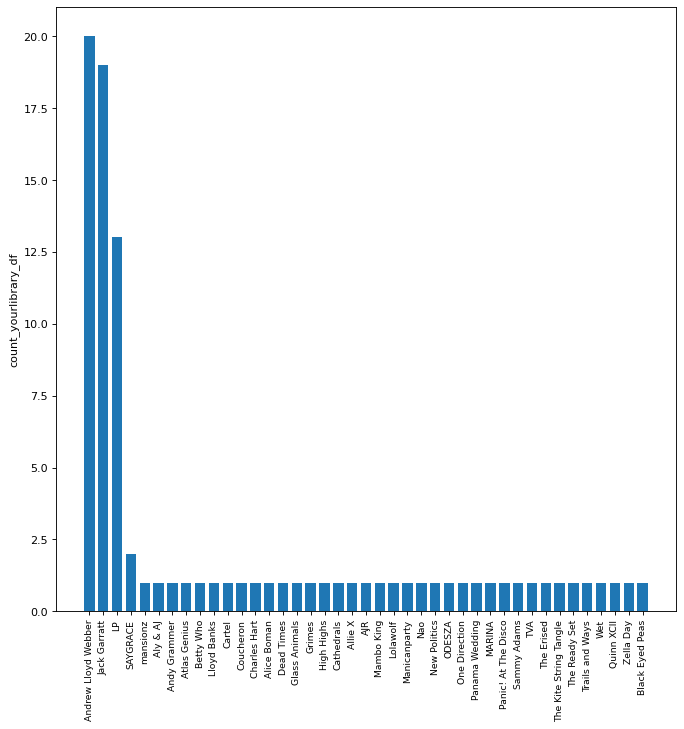

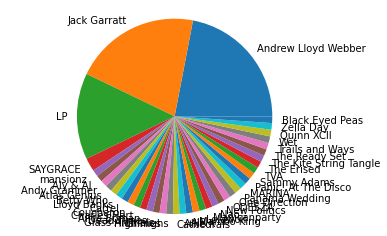

In [60]:
sortcount = count_yourlibrary_df.sort_values('track' ,ascending=False)
labels = sortcount['track'].keys()
vals = sortcount['track']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('count_yourlibrary_df')
plt.xticks(rotation=90, fontsize = 'small')
#plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels)
ax2.axis('equal')
#plt.show()

(-1.1000038688720133,
 1.1000001842320006,
 -1.100000949949732,
 1.100009816187839)

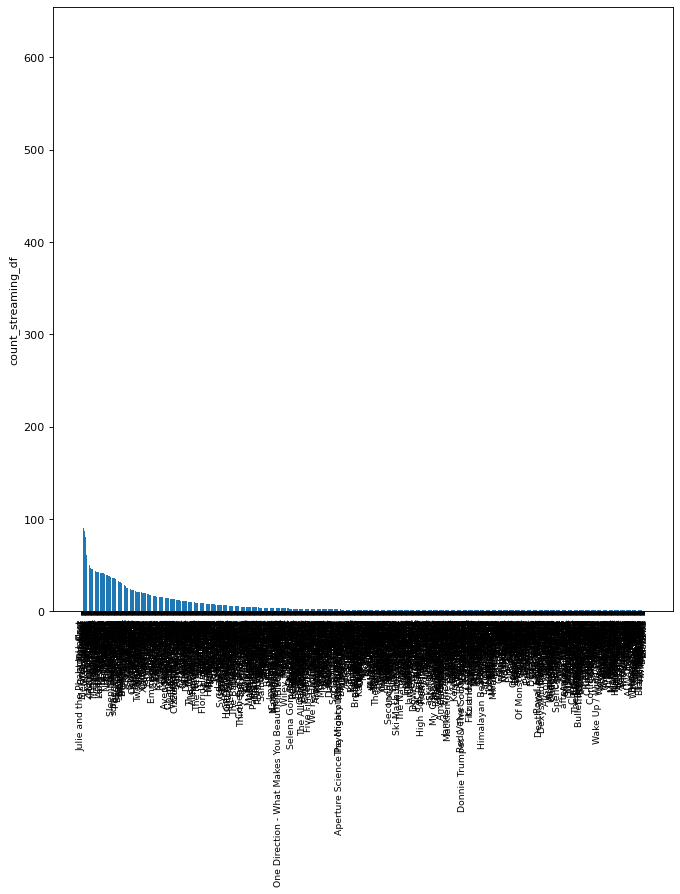

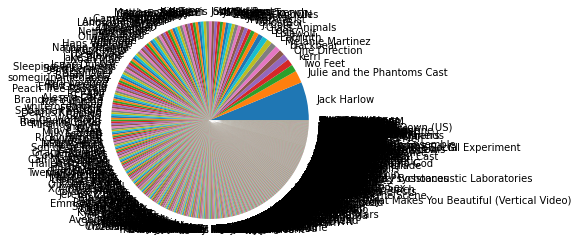

In [57]:
sortcount = count_streaming_df.sort_values('trackName' ,ascending=False)
labels = sortcount['trackName'].keys()
vals = sortcount['trackName']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('count_streaming_df')
plt.xticks(rotation=90, fontsize = 'small')
#plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels)
ax2.axis('equal')
#plt.show()

(-1.1003853007798554,
 1.1000183477434735,
 -1.10004522365942,
 1.1006252963163996)

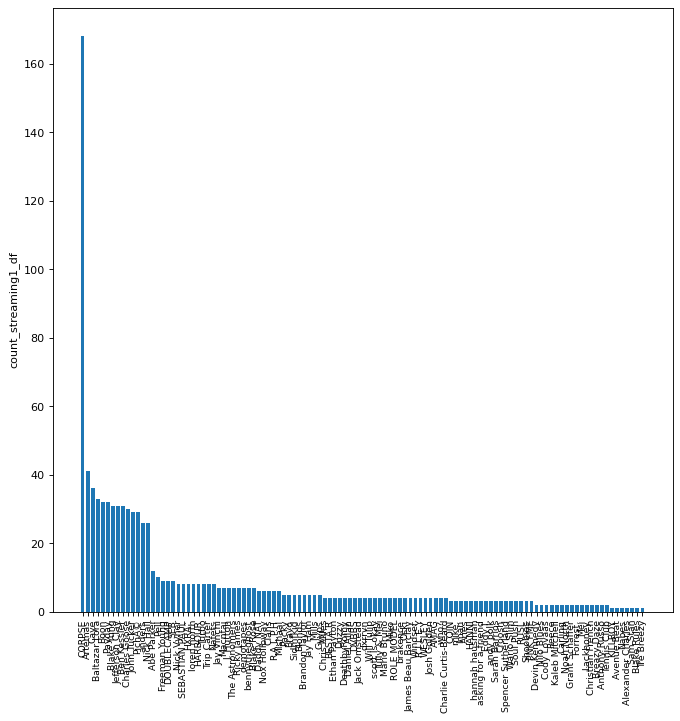

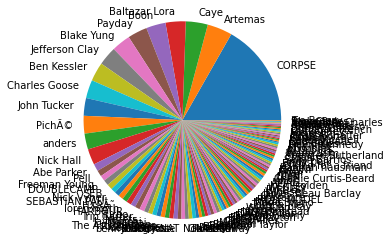

In [56]:
sortcount = count_streaming1_df.sort_values('trackName' ,ascending=False)
labels = sortcount['trackName'].keys()
vals = sortcount['trackName']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('count_streaming1_df')
plt.xticks(rotation=90, fontsize = 'small')
#plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels)
ax2.axis('equal')
#plt.show()

## Analysis

There are a lot of artists that I listen to. There are also a few that I listen to frequently. I started the analyzing by counting the amount of tracks per artist after loading in the datasets. I added in some bar graphs and pie graphs which I will have to fix because of how hard some are to read. I am planning to go more in depth and compare bewtween different dates.  This will help me understand how I was feeling on a specific day or during a specific week. 

## Conclusions
##### This is not the final conclusion

I created this account when I was 13 which is crazy because I thought that I would have had it longer. I have found a lot of songs that I do not remember a lot. There are also songs that I liked a lot and listened to them repeatedly. The milliseconds of how long I listened to each song is a lot more than I thought it would be. 

I found out part of the answer to my question. I have noticed that I listen to many different artists than I used to all in different genres of music. The most listened to artists I listened to at the beginning of this year was CORPSE. Before that Jack Harlow was a top artist I listened to. I have data from a playlist that was made just before I saw Phantom of the Opera in London, England. That data shows that I listened to the music from that play constantly.

I am still having troubles cleaning my data up but that will be fixed for the final turn in.